# Problem 4
For this problem, you need to use the built-in sklearn digits dataset. You can load this data using Sklearn.datasets.load_digits (*, n_class=10,return_X_y=False, as_frame=False) Divide the data into training and test sets using train_test_split and random_state=0 The goal is to train a Random Forest classifier and optimize its performance on this data.
1. Identify the most important parameters that affect the performance of the Random Forest classifier and outline your experimental design (using 4-fold cross validation) to learn the optimal values for these parameters.
2. Analyze the results of the classifier using its optimal parameters and comment on its generalization capability.
3. Visualize and explain the relevant features identified by the Random Forest classifier.
+ Create a white 8x8 image that represents the original 64 features. Map each identified relevant feature to this 2D image and display it using a grey scale that reflects its importance (e.g. 0 most relevant feature and 255  least relevant feature).
4. Identify one misclassified sample from each class (if they exist). Visualize each misclassified sample as an 8x8 image, and use its nearest neighbors and the learned important features to explain why it was misclassified.

Hint: for examples on how to read this data and visualize it, check
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glrauto-examples-classification-plot-digits-classification-py

## Import and setup data

In [16]:
import numpy as np
import sklearn.datasets
import sklearn_evaluation
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

digits = sklearn.datasets.load_digits(n_class=10, return_X_y=False, as_frame=False)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    test_size=0.5,
    shuffle=False,
    random_state=0
)

898

## Train Random Forest classifier

In [37]:
def grid_search_random_forest(
        n_estimators,
        max_features,
        max_depth=None,
        max_leaf_nodes=None
):
    parameters = {
        'n_estimators': n_estimators,
        'max_features': max_features,
    }
    if max_depth is not None:
        parameters.update({'max_depth': max_depth, })
    if max_leaf_nodes is not None:
        parameters.update({'max_leaf_nodes': max_leaf_nodes})
    classifier = RandomForestClassifier(random_state=2)

    grid_search = GridSearchCV(
        classifier,
        parameters,
        cv=4,
        return_train_score=True,

    )

    grid_search.fit(X_train, y_train)
    print("Best n_estimators: ", grid_search.best_params_['n_estimators'])
    print("Best max_features: ", grid_search.best_params_['max_features'])
    if max_depth is not None:
        print("Best max_depth: ", grid_search.best_params_['max_depth'])
    if max_leaf_nodes is not None:
        print("Best max_leaf_nodes: ", grid_search.best_params_['max_leaf_nodes'])
    predictions = grid_search.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
    return grid_search


def graph_grid_search_random_forest(grid_search):
    sklearn_evaluation.evaluator.plot.grid_search(
        grid_search.cv_results_,
        change=("n_estimators", "max_features")
    )

    plt.title("Random Forest")
    plt.xlabel("n_estimators")
    plt.ylabel("max_features")
    plt.legend()
    plt.show()

In [38]:
n_estimators = np.linspace(20, 40, 3, dtype=int)
max_features = np.linspace(1, 12, 6, dtype=int)

grid_search = %time grid_search_random_forest( n_estimators, max_features )

Best n_estimators:  40
Best max_features:  12
Accuracy:  0.9276974416017798
CPU times: user 3.96 s, sys: 52.4 ms, total: 4.01 s
Wall time: 4.02 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


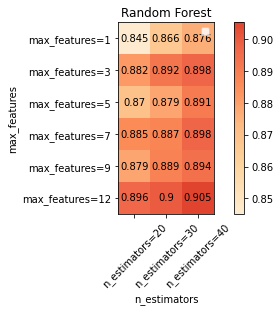

In [8]:
graph_grid_search_random_forest(grid_search)


In [9]:
n_estimators = np.linspace(40, 100, 3, dtype=int)
max_features = np.linspace(7, 16, 6, dtype=int)

grid_search = % time grid_search_random_forest( n_estimators, max_features )

Best n_estimators:  70
Best max_features:  12
Accuracy:  0.9265850945494994
CPU times: user 9.42 s, sys: 71.9 ms, total: 9.49 s
Wall time: 9.52 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


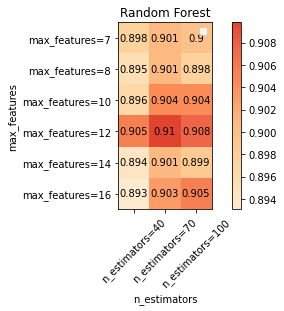

In [10]:
graph_grid_search_random_forest(grid_search)


In [11]:
n_estimators = np.linspace(50, 90, 5, dtype=int)
max_features = np.linspace(10, 14, 5, dtype=int)

grid_search = % time grid_search_random_forest( n_estimators, max_features )

Best n_estimators:  80
Best max_features:  12
Accuracy:  0.9265850945494994
CPU times: user 13.8 s, sys: 107 ms, total: 13.9 s
Wall time: 13.9 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


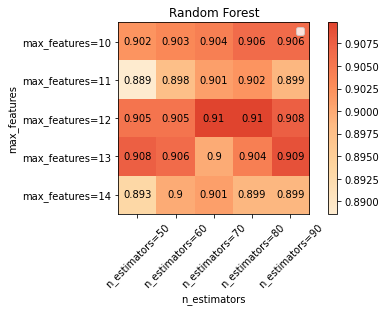

In [12]:
graph_grid_search_random_forest(grid_search)

In [40]:
n_estimators = np.linspace(20, 40, 3, dtype=int)
max_features = np.linspace(1, 12, 6, dtype=int)
max_depth = np.linspace(5, 50, 5, dtype=int)

grid_search = %time grid_search_random_forest(n_estimators, max_features, max_depth)

Best n_estimators:  40
Best max_features:  12
Best max_depth:  16
Accuracy:  0.9276974416017798
CPU times: user 18.4 s, sys: 223 ms, total: 18.6 s
Wall time: 18.7 s


In [42]:
n_estimators = np.linspace(60, 100, 3, dtype=int)
max_features = np.linspace(9, 15, 6, dtype=int)
max_depth = np.linspace(5, 50, 5, dtype=int)

grid_search = %time grid_search_random_forest(n_estimators, max_features, max_depth)

Best n_estimators:  80
Best max_features:  12
Best max_depth:  16
Accuracy:  0.9265850945494994
CPU times: user 47.8 s, sys: 500 ms, total: 48.3 s
Wall time: 48.5 s
Best n_estimators:  80
Best max_features:  12
Best max_depth:  16
Accuracy:  0.9265850945494994
CPU times: user 55.8 s, sys: 531 ms, total: 56.3 s
Wall time: 56.7 s


In [43]:
n_estimators = np.linspace(60, 100, 3, dtype=int)
max_features = np.linspace(9, 15, 3, dtype=int)
max_depth = np.linspace(10, 30, 3, dtype=int)
max_leaf_nodes = np.linspace(1, 50, 5, dtype=int)

grid_search = %time grid_search_random_forest(n_estimators, max_features, max_depth, max_leaf_nodes)

Best n_estimators:  80
Best max_features:  15
Best max_depth:  10
Best max_leaf_nodes:  50
Accuracy:  0.9110122358175751
CPU times: user 1min 5s, sys: 633 ms, total: 1min 5s
Wall time: 1min 6s


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
108 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/

In [44]:
n_estimators = np.linspace(60, 100, 3, dtype=int)
max_features = np.linspace(12, 18, 3, dtype=int)
max_depth = np.linspace(5, 15, 3, dtype=int)
max_leaf_nodes = np.linspace(40, 140, 5, dtype=int)

grid_search = %time grid_search_random_forest(n_estimators, max_features, max_depth, max_leaf_nodes)

Best n_estimators:  100
Best max_features:  15
Best max_depth:  10
Best max_leaf_nodes:  90
Accuracy:  0.9243604004449388
CPU times: user 1min 22s, sys: 706 ms, total: 1min 23s
Wall time: 1min 23s


## Test the trained model

In [45]:
rf = RandomForestClassifier(
    n_estimators=80,
    max_features=12
)
rf.fit(X_train, y_train)
y_predictions = rf.predict(X_test)
metrics.accuracy_score(y_test, y_predictions)

0.9221357063403782

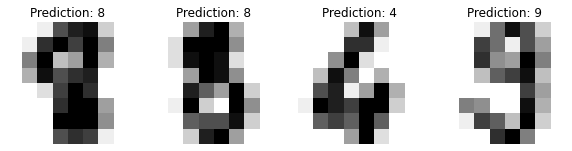

In [46]:


_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_predictions):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")